In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
from matplotlib import rcParams

# Set global font properties to Arial
rcParams.update(
    {
        "font.family": "sans-serif",
        "font.sans-serif": "Arial",
        "pdf.fonttype": 42,  # Embed fonts as Type 3 fonts for compatibility
        "ps.fonttype": 42,
        "text.usetex": False,
        "svg.fonttype": "none",
    }
)

rcParams.update(
    {
        "font.size": 24,  # Set a default font size
        "legend.fontsize": 16,
        "legend.handlelength": 2,
        "axes.linewidth": 2,
    }
)

plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.labelsize"] = 20


In [3]:
d1 = "#BF1D2D"
d2 = "#262626"
d3 = "#293890"

e1 = "#2F2D54"
e2 = "#9193B4"
e3 = "#BD9AAD"
e4 = "#E8D2B3"

f1 = "#377eb8"
f2 = "#4daf4a"

g1 = "#b7bec8ff"
g2 = "#ff8080ff"
g3 = "#ff9999ff"
g4 = "#ffb3b3ff"

# SV Evaluation


In [4]:
# CNN for mk1c
# Data for stacked bar chart (TP/FP composition)
# Format: Set_Name, TP, FP, Total
# Set_A   7193    444197  451390
# Set_B   6586    293841  300427
# Set_C   6542    159109  165651

# Data for TP retention & decomposition chart
# Set A TP
# A_TP    7193
# Set C TP and retention
# C_TP    6542
# Retention_percentage    0.9095
# Set B TP decomposition
# B_TP_total      6586
# B_intersect_D   5837
# Overkill        749


# Hyena for mk1c

# Data for stacked bar chart (TP/FP composition)
# Format: Set_Name, TP, FP, Total
# Set_A   7193    444197  451390
# Set_B   6818    420891  427709
# Set_C   6269    32163   38432

# Data for TP retention & decomposition chart
# Set A TP
# A_TP    7193
# Set C TP and retention
# C_TP    6269
# Retention_percentage    0.8715
# Set B TP decomposition
# B_TP_total      6818
# B_intersect_D   5828
# Overkill        990

# hyena for p2

# Data for stacked bar chart (TP/FP composition)
# Format: Set_Name, TP, FP, Total
# Set_A   8815    3601099 3609914
# Set_B   8416    3503114 3511530
# Set_C   8067    297503  305570

# Data for TP retention & decomposition chart
# Set A TP
# A_TP    8815
# Set C TP and retention
# C_TP    8067
# Retention_percentage    0.9151
# Set B TP decomposition
# B_TP_total      8416
# B_intersect_D   7337
# Overkill        1079


In [25]:
def draw_stacked_bar_chart(data, group_name, file_name=None, group1_color=g2, group2_color=g1, reduction_percentage_y_shift=10000):
    # Extracting data for plotting
    sets = list(data.keys())

    group1_name = group_name[0]
    group2_name = group_name[1]

    bulk_values = [data[set_name][group1_name] for set_name in sets]
    no_support_values = [data[set_name][group2_name] for set_name in sets]

    # Define colors for Bulk and No support
    bulk_color = group1_color  
    no_support_color = group2_color 

    # Plotting the stacked bar chart
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(sets, bulk_values, label=group1_name, color=bulk_color)
    ax.bar(
        sets,
        no_support_values,
        bottom=bulk_values,
        label=group2_name,
        color=no_support_color,
    )

    # Adding total number on the top of each bar
    for i, set_name in enumerate(sets):
        total_value = bulk_values[i] + no_support_values[i]
        ax.text(i, total_value + 5000, f"{total_value}", ha='center', va='bottom', fontsize=10)

        # Calculate and display the total number reduction percentage for ChimeraLM compared to MDA
        if set_name == "ChimeraLM Dataset":
            mda_total = bulk_values[sets.index("MDA Dataset")] + no_support_values[sets.index("MDA Dataset")]
            reduction_percentage = ((mda_total - total_value) / mda_total) * 100
            ax.text(i, total_value + reduction_percentage_y_shift, f"Reduction: {reduction_percentage:.2f}%", ha='center', va='bottom', fontsize=10, color='red')

    # Adding labels and title
    ax.set_ylabel("Count (1000 X)", fontsize=16)

    # Adjust y-tick labels to be in thousands
    y_ticks = ax.get_yticks()
    ax.set_yticklabels([f"{int(tick/1000)}" for tick in y_ticks])

    ax.legend()

    # Improve layout
    sns.despine(offset=10, trim=True)
    plt.tight_layout()

    if file_name is not None:
        plt.savefig(file_name, dpi=300)

def draw_support_bar_chart(data, group_name, file_name=None, group1_color=g2, group2_color=g1):
    # Extracting data for plotting
    sets = list(data.keys())

    group1_name = group_name[0]
    group2_name = group_name[1]

    supported_values = [data[set_name][group1_name] for set_name in sets]

    # Define colors for supported
    supported_color = group1_color

    # Plot bar chart for only supported
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(sets, supported_values, label=group1_name, color=supported_color)

    # Calculate and display the percentage of ChimeraLM support relative to MDA support
    mda_support = data["MDA Dataset"][group1_name]
    chimera_support = data["ChimeraLM Dataset"][group1_name]
    percentage_support = (chimera_support / mda_support) * 100

    # Adding percentage text on the plot
    ax.text(1, chimera_support + 500, f"Retention: {percentage_support:.2f}%", ha='center', va='bottom', fontsize=10, color='red')

    ax.set_ylabel("Count", fontsize=16)

    sns.despine(offset=10, trim=True)
    plt.tight_layout()

    if file_name is not None:
        plt.savefig(file_name, dpi=300)

In [26]:
cnn_mk1c_data = {
    "MDA Dataset": {"Supported": 7193, "Unsupported": 444197},
    "ChimeraLM Dataset": {"Supported": 6542, "Unsupported": 159109},
}

hyena_mk1c_data = {
    "MDA Dataset": {"Supported": 7193, "Unsupported": 444197},
    "ChimeraLM Dataset": {"Supported": 6269, "Unsupported": 32163},
}

hyena_p2_data = {
    "MDA Dataset": {"Supported": 8815, "Unsupported": 3601099},
    "ChimeraLM Dataset": {"Supported": 8067, "Unsupported": 297503},
}


/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_83800/1407858057.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(tick/1000)}" for tick in y_ticks])


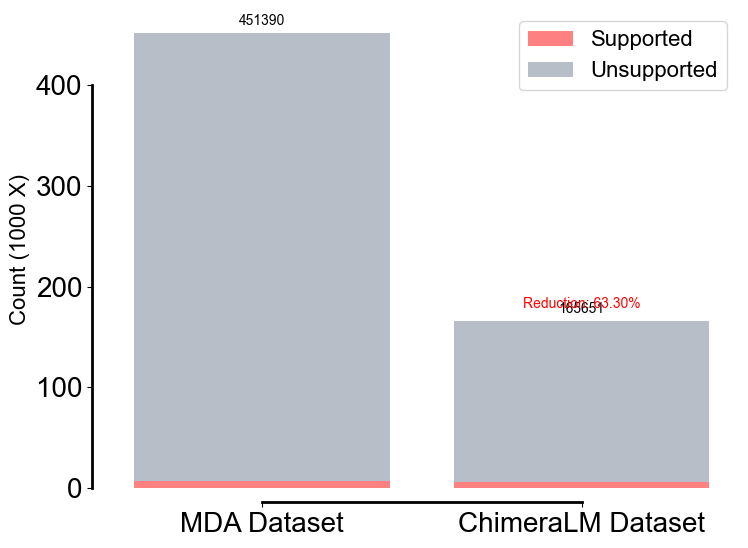

In [27]:
# Data for stacked bar chart (Bulk/No support composition)
draw_stacked_bar_chart(cnn_mk1c_data, ["Supported", "Unsupported"], "cnn_mk1c.pdf")

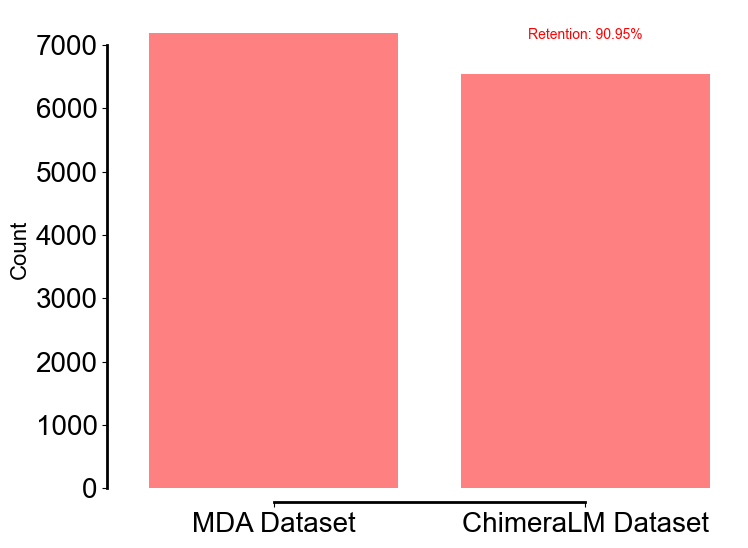

In [8]:
draw_support_bar_chart(cnn_mk1c_data, ["Supported", "Unsupported"], "cnn_mk1c_support.pdf")

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_83800/1407858057.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(tick/1000)}" for tick in y_ticks])


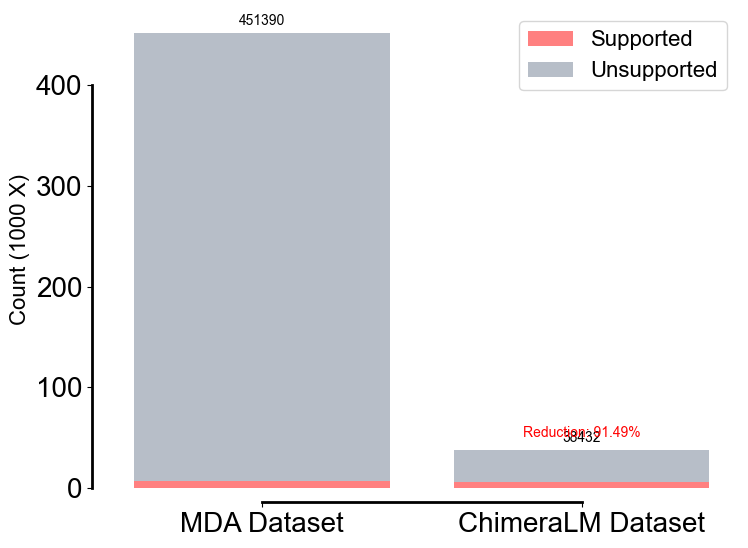

In [9]:
draw_stacked_bar_chart(hyena_mk1c_data, ["Supported", "Unsupported"], "hyena_mk1c.pdf")

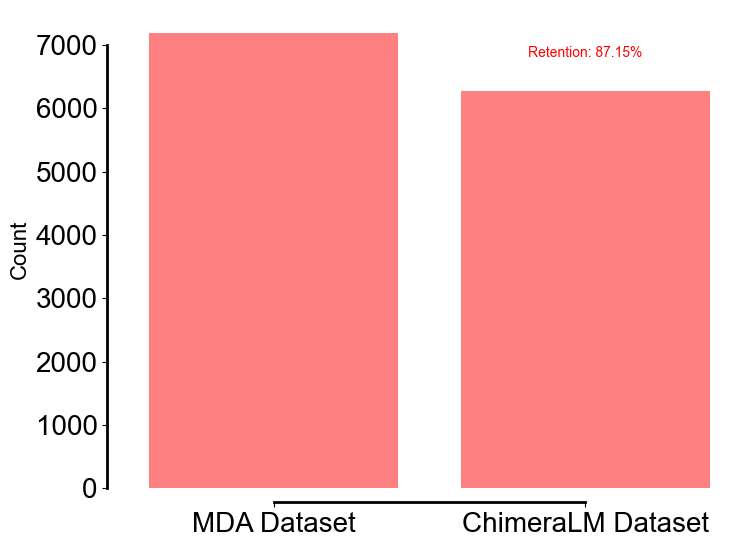

In [10]:
draw_support_bar_chart(hyena_mk1c_data, ["Supported", "Unsupported"], "hyena_mk1c_support.pdf")

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_83800/1407858057.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{int(tick/1000)}" for tick in y_ticks])


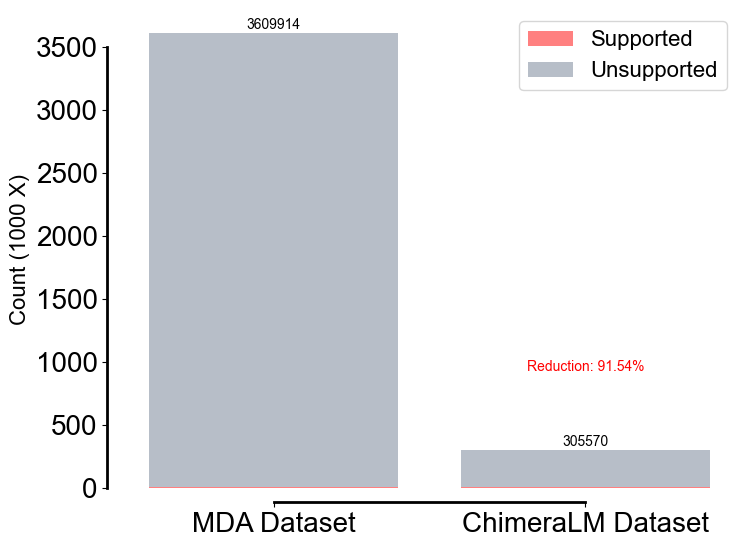

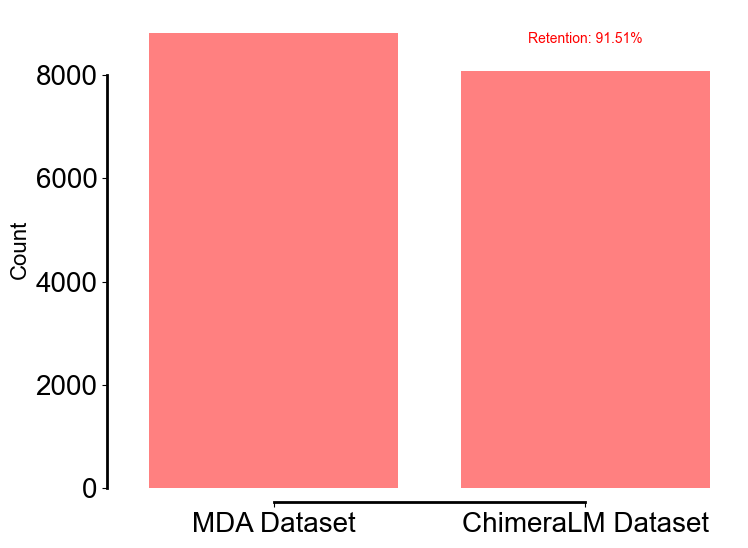

In [11]:
draw_stacked_bar_chart(hyena_p2_data, ["Supported", "Unsupported"], "hyena_p2.pdf", reduction_percentage_y_shift=600000)
draw_support_bar_chart(hyena_p2_data, ["Supported", "Unsupported"], "hyena_p2_support.pdf")

# Chimeric Reads




| Sample | No. chimeric reads  | No. total reads | ratio |
|---|---|---|---|
| P2 MDA | 12963576 | 28027667  | 0.46 |  
| P2 Bulk |  233740  | 10065403  | 0.023  | 
| mk1c MDA | 1666427 |7193945  | 0.23 | 
| mk1c Bulk | 28748 |1140363  | 0.025  | 




| Sample | No. chimeric reads  | No. total reads | ratio |
|---|---|---|---|
| P2 MDA | 12963576 | 28027667  | 0.46 |  
| P2 Bulk |  233740  | 10065403  | 0.023  | 
| P2 ChimeraLM |  769743  | 15833834  | 0.0486  | 
| mk1c MDA | 1666427 |7193945  | 0.23 | 
| mk1c Bulk | 28748 |1140363  | 0.025  |
| mk1c ChimeraLM | 82734 |5610252  | 0.0147  |



mk1c prediction: {1: 1583693, 0: 82734}
p2 prediction: {1: 12193833, 0: 769743}

<Figure size 1500x600 with 0 Axes>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

Text(0, 0.5, 'No. of Reads')

Text(0, 29429050.35, 'Percentage: 46.0%')

Text(1, 10568673.15, 'Percentage: 2.3%')

Text(2, 16625525.7, 'Percentage: 4.9%')

Text(3, 7553642.25, 'Percentage: 23.0%')

Text(4, 1197381.15, 'Percentage: 2.5%')

Text(5, 5890764.6, 'Percentage: 1.5%')

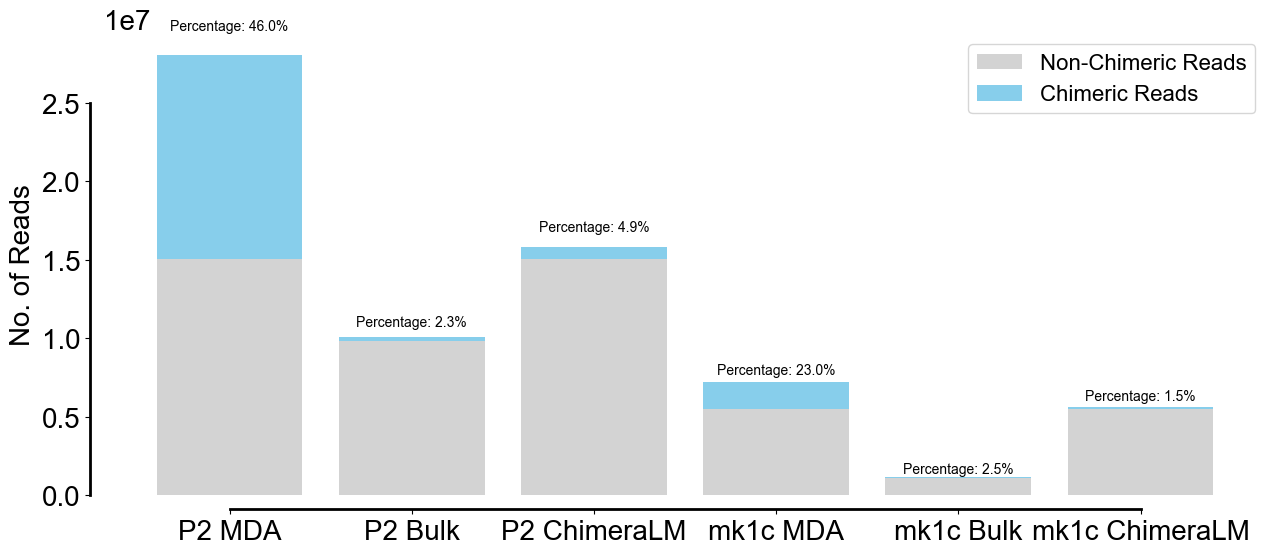

In [12]:
# Define the new data
samples_new = ["P2 MDA", "P2 Bulk", "P2 ChimeraLM", "mk1c MDA", "mk1c Bulk", "mk1c ChimeraLM"]
chimeric_reads_new = [12963576, 233740, 769743, 1666427, 28748, 82734]
total_reads_new = [28027667, 10065403, 15833834, 7193945, 1140363, 5610252]
ratios_new = [0.46, 0.023, 0.0486, 0.23, 0.025, 0.0147]

# Create a stacked bar chart for the new data
plt.figure(figsize=(15, 6))
ax_new = plt.gca()

# Plot the non-chimeric reads at the bottom
non_chimeric_reads_new = [
    total - chimeric for total, chimeric in zip(total_reads_new, chimeric_reads_new)
]
ax_new.bar(
    samples_new,
    non_chimeric_reads_new,
    label="Non-Chimeric Reads",
    color="lightgrey",
)

# Plot the chimeric reads on top
ax_new.bar(samples_new, chimeric_reads_new, bottom=non_chimeric_reads_new, label="Chimeric Reads", color="skyblue")

# Add labels and title
plt.ylabel("No. of Reads")
ax_new.legend()

# Annotate the bars with the chimeric ratio
for i, ratio in enumerate(ratios_new):
    percentage = ratio * 100
    ax_new.text(
        i,
        total_reads_new[i] + 0.05 * total_reads_new[i],
        f"Percentage: {percentage:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10,
    )

sns.despine(offset=10, trim=True)

plt.savefig("chimeric_reads_stacked_bar_chart_with_chimera_lm.pdf", dpi=300)

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0, 0.5, 'No. of Reads')

Text(0, 29429050.35, 'Percentage: 46.0%')

Text(1, 10568673.15, 'Percentage: 2.3%')

Text(2, 7553642.25, 'Percentage: 23.0%')

Text(3, 1197381.15, 'Percentage: 2.5%')

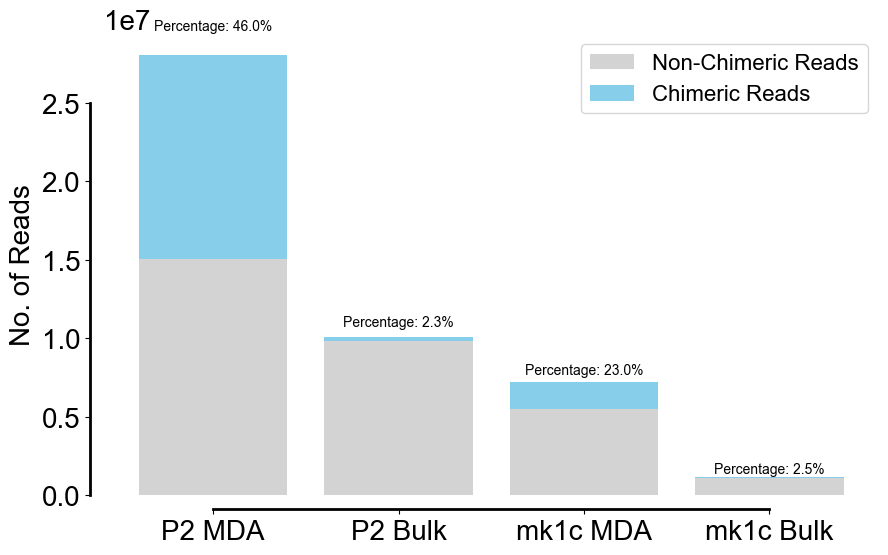

In [99]:
samples = ["P2 MDA", "P2 Bulk", "mk1c MDA", "mk1c Bulk"]
chimeric_reads = [12963576, 233740, 1666427, 28748]
total_reads = [28027667, 10065403, 7193945, 1140363]
ratios = [0.46, 0.023, 0.23, 0.025]

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the non-chimeric reads at the bottom
non_chimeric_reads = [
    total - chimeric for total, chimeric in zip(total_reads, chimeric_reads)
]
ax.bar(
    samples,
    non_chimeric_reads,
    label="Non-Chimeric Reads",
    color="lightgrey",
)

# Plot the chimeric reads on top
ax.bar(samples, chimeric_reads, bottom=non_chimeric_reads, label="Chimeric Reads", color="skyblue")

# Add labels and title
plt.ylabel("No. of Reads")
ax.legend()

# Annotate the bars with the chimeric ratio
for i, ratio in enumerate(ratios):
    percentage = ratio * 100
    ax.text(
        i,
        total_reads[i] + 0.05 * total_reads[i],
        f"Percentage: {percentage:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10,
    )

sns.despine(offset=10, trim=True)
plt.savefig("chimeric_reads_stacked_bar_chart.png", dpi=300)

<Figure size 800x600 with 0 Axes>

Text(0, 0.5, 'No. chimeric reads')

[Text(0, 0, '12670396.00'),
 Text(0, 0, '190309.00'),
 Text(0, 0, '101094.00'),
 Text(0, 0, '1777.00')]

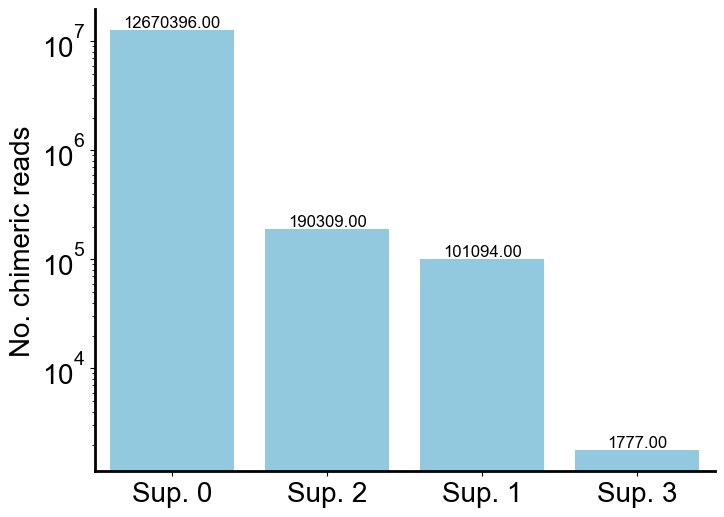

In [13]:
# Data for the bar chart
samples = ["Sup. 0", "Sup. 2", "Sup. 1", "Sup. 3"]
values = [12670396, 190309, 101094, 1777]

# Create a bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=samples, y=values, color='skyblue')

# Add labels and title
plt.ylabel('No. chimeric reads')
ax.bar_label(ax.containers[0], fmt="%.2f", fontsize=12)
plt.yscale("log")
sns.despine()

plt.savefig("p2_sup_by_bulk_chimeric_reads.pdf", dpi=300)

<Figure size 800x600 with 0 Axes>

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_83800/414810031.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=metrics, y=values, palette='muted')


Text(0, 0.8545590519905091, '0.805')

Text(1, 0.7497780203819275, '0.700')

Text(2, 0.9962446570396425, '0.946')

Text(0, 0.5, 'Values')

(0.0, 1.0)

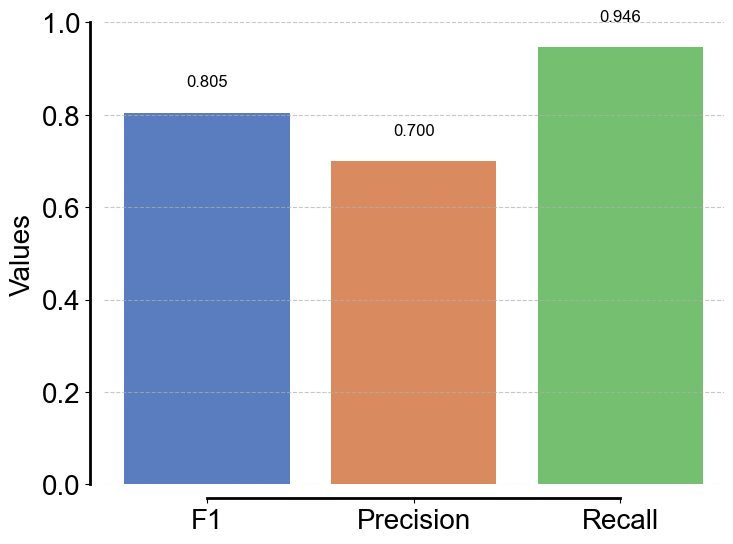

In [14]:
# Data for the bar plot
metrics = ["F1", "Precision", "Recall"]
values = [0.804559051990509, 0.6997780203819275, 0.9462446570396424]

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=metrics, y=values, palette='muted')

# Annotate the bars with the values
for i, value in enumerate(values):
    ax.text(i, value + 0.05, f"{value:.3f}", ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.ylabel('Values')
plt.ylim(0, 1)  # Set y-axis limits for better comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(offset=10, trim=True)

plt.savefig("performance_metrics_bar_plot.pdf", dpi=300)

# Read length and Number of chimeric alignments



In [15]:
import numpy as np

read_length_data = {
    "P2 MDA": "./data/prediction_and_chimeric/PC3_10_cells_MDA_P2_dirty.npz",
    "P2 Bulk": "./data/prediction_and_chimeric/PC3_bulk_WGS_P2_clean_read_lengths.npz",
    "mk1c MDA": "./data/prediction_and_chimeric/PC3_10_cells_MDA_Mk1c_dirty.chimeric.npz",
    "mk1c Bulk": "./data/prediction_and_chimeric/PC3_bulk_WGS_mk1c_clean_read_lengths.npz",
}

def load_npz_data(npz_file_path):
    results= {}
    for key, value in npz_file_path.items():
        data = np.load(value)
        results[key] = data["read_lengths"]
    return results

def plot_read_length_distribution_from_npz(read_length_data, figsize=(12, 8),  figure_name=None, max_y_value=None, plot_type="boxen"):
    """
    Plot the distribution of values from multiple numpy arrays stored in npz files.

    Parameters:
    read_length_data (dict): Dictionary where keys are dataset names and values are paths to the npz files.
    """
    plt.figure(figsize=figsize)
    # Create a box plot for all datasets
    if plot_type == "boxen":
        sns.boxenplot(data=read_length_data)
    elif plot_type == "box":
        sns.boxplot(data=read_length_data)
    elif plot_type == "kde":
        sns.kdeplot(data=read_length_data, fill=True)
    elif plot_type == "violin":
        sns.violinplot(data=read_length_data)

    plt.xlabel("Datasets")
    plt.ylabel("Read Length")

    # set max y value
    if max_y_value is not None:
        plt.ylim(0, max_y_value)

    sns.despine(offset=10, trim=True)

    if figure_name is not None:
        plt.savefig(figure_name, dpi=300)


In [36]:
read_length_array = load_npz_data(read_length_data)

In [ ]:
read_length_array

{'P2 MDA': array([ 584,  517,  646, ..., 1304, 6372,  739], shape=(12963576,)),
 'P2 Bulk': array([ 2111, 62071, 23792, ..., 46520,  2255,  1049], shape=(233740,)),
 'mk1c MDA': array([3895, 3139, 5973, ...,  854, 1228,  857], shape=(1666427,)),
 'mk1c Bulk': array([30988, 29496,  6327, ...,  8509, 72181, 14390], shape=(28748,))}

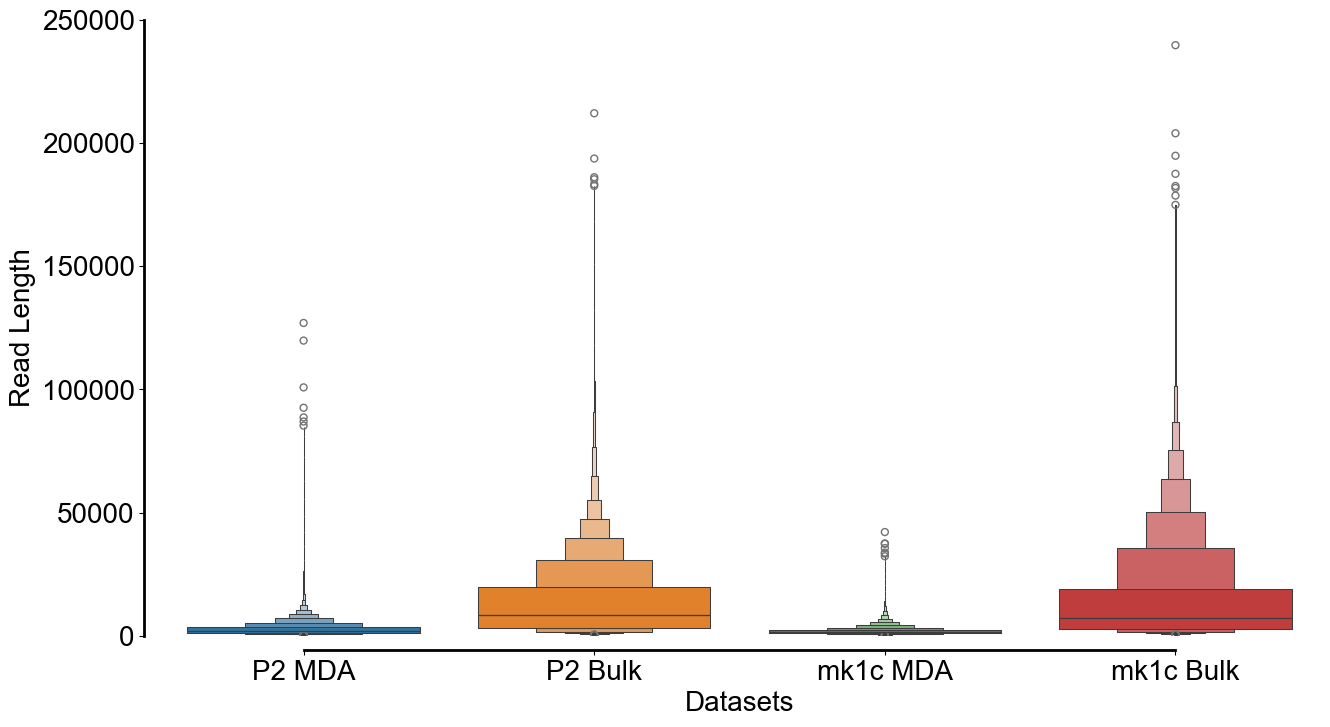

In [48]:
plot_read_length_distribution_from_npz(read_length_array, figsize=(15, 8), figure_name="read_length_distribution.pdf",
 max_y_value=250000
 )

In [ ]:
def load_number_of_chimeric_alignments_from_file(file_path):
    results = []
    with open(file_path, 'r') as file:
        for line in file:
            content = line.strip().split()
            num_chimeric_alignments = int(content[1])
            results.append(num_chimeric_alignments)
    return np.array(results)

num_chimeric_alignment_files = {
    "P2 MDA": "./data/prediction_and_chimeric/PC3_10_cells_MDA_P2_dirty.chimeric_events.txt",
    "P2 Bulk": "./data/prediction_and_chimeric/PC3_bulk_WGS_P2_clean.chimeric_events.txt",
    "mk1c MDA": "./data/prediction_and_chimeric/PC3_10_cells_MDA_Mk1c_dirty.chimeric_events.txt",
    "mk1c Bulk": "./data/prediction_and_chimeric/PC3_bulk_WGS_mk1c_clean.chimeric_events.txt",
}

def draw_number_of_chimeric_alignments_distribution(num_chimeric_alignment_files:dict[str, list[int]], figsize=(12, 8), figure_name=None):
    plt.figure(figsize=figsize)

    sns.kdeplot(num_chimeric_alignment_files, fill=True)
    plt.legend(title='Datasets')

    plt.xlabel("Datasets")
    plt.ylabel("Number of Chimeric Alignments")
    plt.title("Number of Chimeric Alignments Distribution")

    if figure_name is not None:
        plt.savefig(figure_name, dpi=300)


In [58]:
num_chimeric_alignment_files


{'P2 MDA': './data/prediction_and_chimeric/PC3_10_cells_MDA_P2_dirty.chimeric_events.txt',
 'P2 Bulk': './data/prediction_and_chimeric/PC3_bulk_WGS_P2_clean.chimeric_events.txt',
 'mk1c MDA': './data/prediction_and_chimeric/PC3_10_cells_MDA_Mk1c_dirty.chimeric_events.txt',
 'mk1c Bulk': './data/prediction_and_chimeric/PC3_bulk_WGS_mk1c_clean.chimeric_events.txt'}

In [59]:
data_number_of_chimeric_alignments = {
    key: load_number_of_chimeric_alignments_from_file(value)
    for key, value in num_chimeric_alignment_files.items()
}

In [60]:
data_number_of_chimeric_alignments

{'P2 MDA': array([4, 3, 3, ..., 2, 2, 2], shape=(12963576,)),
 'P2 Bulk': array([2, 8, 2, ..., 3, 2, 5], shape=(233740,)),
 'mk1c MDA': array([2, 2, 2, ..., 2, 2, 2], shape=(1666427,)),
 'mk1c Bulk': array([2, 7, 3, ..., 5, 3, 2], shape=(28748,))}

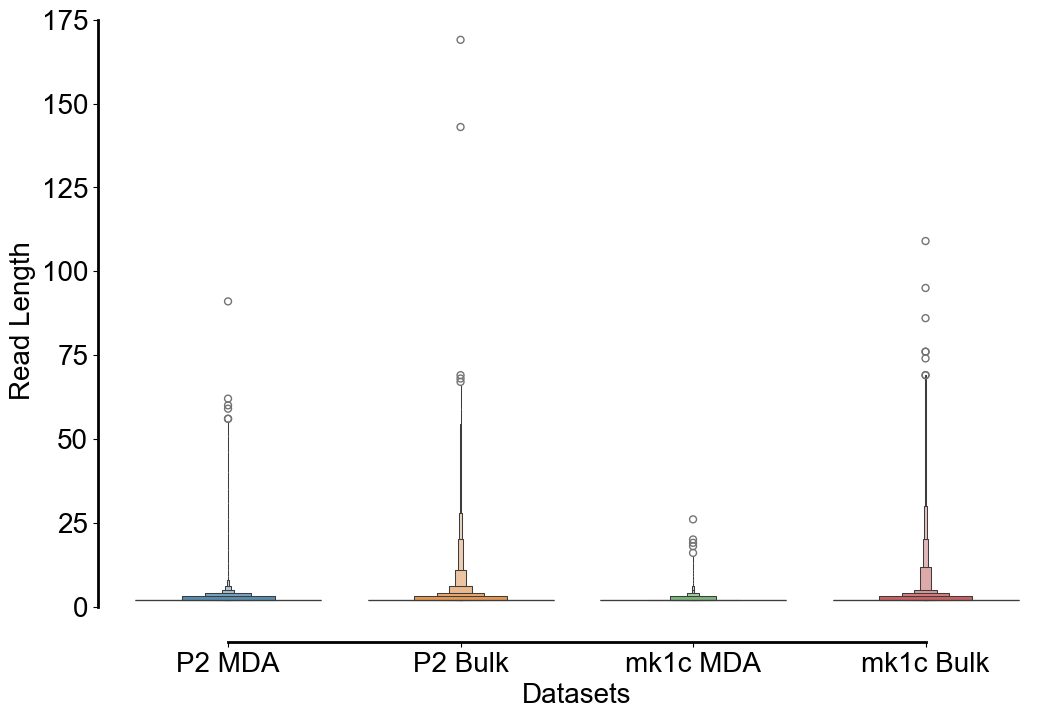

In [61]:
plot_read_length_distribution_from_npz(
    data_number_of_chimeric_alignments,
    figsize=(12, 8),
    figure_name="number_of_chimeric_alignments_distribution.pdf",
)


# SV Pattern


In [5]:
# read excel file
sv_data = pd.read_excel("./data/SV_Pattern_Change_Analysis .xlsx")


In [7]:
sv_data 
sv_data.columns

,Model,Dataset,Set,Sample_Type,Filename,TRA_count,TRA_percentage,DEL_count,DEL_percentage,INV_count,INV_percentage,DUP_count,DUP_percentage,INS_count,INS_percentage,Full_Path
0,Bulk,Mk1c,Reference,Bulk_Clean,sniffles_PC3_bulk_WGS_Mk1c_clean_sv_stats.txt,552,2.05,12942,48.03,1431,5.31,176,0.65,11842,43.95,./bulk_clean_references/sniffles_PC3_bulk_WGS_...
1,Bulk,P2,Reference,Bulk_Clean,sniffles_PC3_bulk_WGS_P2_clean_sv_stats.txt,5293,4.44,72178,60.53,11089,9.30,1027,0.86,29655,24.87,./bulk_clean_references/sniffles_PC3_bulk_WGS_...
2,Bulk,PacBio,Reference,Bulk_Clean,sniffles_PC3_pacbio_sv_stats.txt,588,1.35,18413,42.21,1730,3.97,768,1.76,22119,50.71,./bulk_clean_references/sniffles_PC3_pacbio_sv...
3,CNN,Mk1c,Set_C,Model_Filtered,sniffles_SetC_cnn_p2_765108_bulk_mk1c_predicts...,919,0.55,18598,11.03,137042,81.29,4009,2.38,8026,4.76,./cnn_p2_765108_bulk_model_on_mk1c_dataset_set...
4,CNN,P2,Set_C,Model_Filtered,sniffles_SetC_cnn_p2_765108_bulk_p2_predicts_s...,11712,1.28,92126,10.11,722961,79.30,26852,2.95,57977,6.36,./cnn_p2_765108_bulk_model_on_P2_dataset_setC/...
5,Hyena,Mk1c,Set_C,Model_Filtered,sniffles_SetC_hyena_p2_765108_bulk_mk1c_predic...,276,0.70,13480,34.39,18121,46.23,788,2.01,6530,16.66,./hyena_p2_765108_bulk_model_on_mk1c_dataset_s...
6,Hyena,P2,Set_C,Model_Filtered,sniffles_SetC_hyena_p2_765108_bulk_p2_predicts...,6324,2.01,65667,20.88,190835,60.67,8622,2.74,43073,13.69,./hyena_p2_765108_bulk_model_on_P2_dataset_set...
7,Original,Mk1c,Set_A,Original_Dirty,sniffles_SetA_Mk1c_dirty_sv_stats.txt,2892,0.63,28471,6.19,406305,88.29,10892,2.37,11613,2.52,./original_data_setA_P2_mk1c/sniffles_SetA_Mk1...
8,Original,P2,Set_A,Original_Dirty,sniffles_SetA_P2_dirty_sv_stats.txt,57911,1.57,262527,7.11,3064158,83.00,155695,4.22,151394,4.10,./original_data_setA_P2_mk1c/sniffles_SetA_P2_...


Index(['Model', 'Dataset', 'Set', 'Sample_Type', 'Filename', 'TRA_count',
       'TRA_percentage', 'DEL_count', 'DEL_percentage', 'INV_count',
       'INV_percentage', 'DUP_count', 'DUP_percentage', 'INS_count',
       'INS_percentage', 'Full_Path'],
      dtype='object')

In [11]:
hyena_sv_data = sv_data[sv_data["Model"] != "CNN"]

In [12]:
hyena_sv_data

,Model,Dataset,Set,Sample_Type,Filename,TRA_count,TRA_percentage,DEL_count,DEL_percentage,INV_count,INV_percentage,DUP_count,DUP_percentage,INS_count,INS_percentage,Full_Path
0,Bulk,Mk1c,Reference,Bulk_Clean,sniffles_PC3_bulk_WGS_Mk1c_clean_sv_stats.txt,552,2.05,12942,48.03,1431,5.31,176,0.65,11842,43.95,./bulk_clean_references/sniffles_PC3_bulk_WGS_...
1,Bulk,P2,Reference,Bulk_Clean,sniffles_PC3_bulk_WGS_P2_clean_sv_stats.txt,5293,4.44,72178,60.53,11089,9.30,1027,0.86,29655,24.87,./bulk_clean_references/sniffles_PC3_bulk_WGS_...
2,Bulk,PacBio,Reference,Bulk_Clean,sniffles_PC3_pacbio_sv_stats.txt,588,1.35,18413,42.21,1730,3.97,768,1.76,22119,50.71,./bulk_clean_references/sniffles_PC3_pacbio_sv...
5,Hyena,Mk1c,Set_C,Model_Filtered,sniffles_SetC_hyena_p2_765108_bulk_mk1c_predic...,276,0.70,13480,34.39,18121,46.23,788,2.01,6530,16.66,./hyena_p2_765108_bulk_model_on_mk1c_dataset_s...
6,Hyena,P2,Set_C,Model_Filtered,sniffles_SetC_hyena_p2_765108_bulk_p2_predicts...,6324,2.01,65667,20.88,190835,60.67,8622,2.74,43073,13.69,./hyena_p2_765108_bulk_model_on_P2_dataset_set...
7,Original,Mk1c,Set_A,Original_Dirty,sniffles_SetA_Mk1c_dirty_sv_stats.txt,2892,0.63,28471,6.19,406305,88.29,10892,2.37,11613,2.52,./original_data_setA_P2_mk1c/sniffles_SetA_Mk1...
8,Original,P2,Set_A,Original_Dirty,sniffles_SetA_P2_dirty_sv_stats.txt,57911,1.57,262527,7.11,3064158,83.00,155695,4.22,151394,4.10,./original_data_setA_P2_mk1c/sniffles_SetA_P2_...


/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_10603/3696265135.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=colors, ax=ax)


<Axes: >

Text(0, 681.4200000000001, '552')

Text(1, 13071.42, '12942')

Text(2, 1560.42, '1431')

Text(3, 305.42, '176')

Text(4, 11971.42, '11842')

Text(0.5, 1.0, 'SV Pattern Distribution for Row 0')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'SV Type')

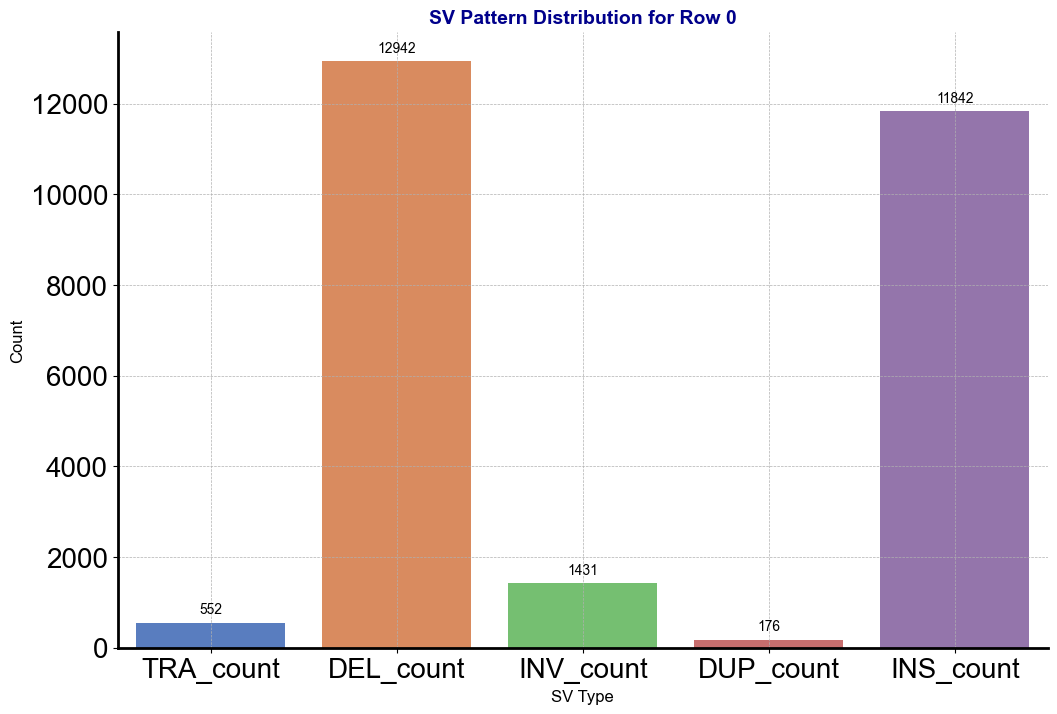

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_10603/3696265135.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=colors, ax=ax)


<Axes: title={'center': 'SV Pattern Distribution for Row 0'}, xlabel='SV Type', ylabel='Count'>

Text(0, 6014.78, '5293')

Text(1, 72899.78, '72178')

Text(2, 11810.78, '11089')

Text(3, 1748.78, '1027')

Text(4, 30376.78, '29655')

Text(0.5, 1.0, 'SV Pattern Distribution for Row 1')

Text(24.999999999999986, 0.5, 'Count')

Text(0.5, 25.000000000000007, 'SV Type')

<Figure size 640x480 with 0 Axes>

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_10603/3696265135.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=colors, ax=ax)


<Axes: title={'center': 'SV Pattern Distribution for Row 1'}, xlabel='SV Type', ylabel='Count'>

Text(0, 809.19, '588')

Text(1, 18634.19, '18413')

Text(2, 1951.19, '1730')

Text(3, 989.19, '768')

Text(4, 22340.19, '22119')

Text(0.5, 1.0, 'SV Pattern Distribution for Row 2')

Text(24.999999999999986, 0.5, 'Count')

Text(0.5, 25.000000000000007, 'SV Type')

<Figure size 640x480 with 0 Axes>

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_10603/3696265135.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=colors, ax=ax)


<Axes: title={'center': 'SV Pattern Distribution for Row 2'}, xlabel='SV Type', ylabel='Count'>

Text(0, 457.21000000000004, '276')

Text(1, 13661.21, '13480')

Text(2, 18302.21, '18121')

Text(3, 969.21, '788')

Text(4, 6711.21, '6530')

Text(0.5, 1.0, 'SV Pattern Distribution for Row 5')

Text(24.999999999999986, 0.5, 'Count')

Text(0.5, 25.000000000000007, 'SV Type')

<Figure size 640x480 with 0 Axes>

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_10603/3696265135.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=colors, ax=ax)


<Axes: title={'center': 'SV Pattern Distribution for Row 5'}, xlabel='SV Type', ylabel='Count'>

Text(0, 8232.35, '6324')

Text(1, 67575.35, '65667')

Text(2, 192743.35, '190835')

Text(3, 10530.35, '8622')

Text(4, 44981.35, '43073')

Text(0.5, 1.0, 'SV Pattern Distribution for Row 6')

Text(24.999999999999986, 0.5, 'Count')

Text(0.5, 25.000000000000007, 'SV Type')

<Figure size 640x480 with 0 Axes>

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_10603/3696265135.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=colors, ax=ax)


<Axes: title={'center': 'SV Pattern Distribution for Row 6'}, xlabel='SV Type', ylabel='Count'>

Text(0, 6955.05, '2892')

Text(1, 32534.05, '28471')

Text(2, 410368.05, '406305')

Text(3, 14955.05, '10892')

Text(4, 15676.05, '11613')

Text(0.5, 1.0, 'SV Pattern Distribution for Row 7')

Text(24.999999999999986, 0.5, 'Count')

Text(0.5, 25.000000000000007, 'SV Type')

<Figure size 640x480 with 0 Axes>

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_10603/3696265135.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette=colors, ax=ax)


<Axes: title={'center': 'SV Pattern Distribution for Row 7'}, xlabel='SV Type', ylabel='Count'>

Text(0, 88552.58, '57911')

Text(1, 293168.58, '262527')

Text(2, 3094799.58, '3064158')

Text(3, 186336.58000000002, '155695')

Text(4, 182035.58000000002, '151394')

Text(0.5, 1.0, 'SV Pattern Distribution for Row 8')

Text(24.999999999999986, 0.5, 'Count')

Text(0.5, 25.000000000000007, 'SV Type')

<Figure size 640x480 with 0 Axes>

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categories and colors for the bar chart
categories = ["TRA_count", "DEL_count", "INV_count", "DUP_count", "INS_count"]
colors = sns.color_palette("muted", len(categories))

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over each row in hyena_sv_data
for index, row in hyena_sv_data.iterrows():
    counts = [row[category] for category in categories]
    
    # Create a bar chart for each row
    sns.barplot(x=categories, y=counts, palette=colors, ax=ax)
    
    # Add value annotations on top of each bar
    for i, count in enumerate(counts):
        ax.text(i, count + max(counts) * 0.01, f'{count}', ha='center', va='bottom', color='black', fontsize=10)
    
    ax.set_title(f'SV Pattern Distribution for Row {index}', fontsize=14, fontweight='bold', color='darkblue')
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xlabel('SV Type', fontsize=12)
    
    # Apply Nature Methods styling
    sns.despine()
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Display the plot
    plt.show()





In [18]:
hyena_sv_data

,Model,Dataset,Set,Sample_Type,Filename,TRA_count,TRA_percentage,DEL_count,DEL_percentage,INV_count,INV_percentage,DUP_count,DUP_percentage,INS_count,INS_percentage,Full_Path
0,Bulk,Mk1c,Reference,Bulk_Clean,sniffles_PC3_bulk_WGS_Mk1c_clean_sv_stats.txt,552,2.05,12942,48.03,1431,5.31,176,0.65,11842,43.95,./bulk_clean_references/sniffles_PC3_bulk_WGS_...
1,Bulk,P2,Reference,Bulk_Clean,sniffles_PC3_bulk_WGS_P2_clean_sv_stats.txt,5293,4.44,72178,60.53,11089,9.30,1027,0.86,29655,24.87,./bulk_clean_references/sniffles_PC3_bulk_WGS_...
2,Bulk,PacBio,Reference,Bulk_Clean,sniffles_PC3_pacbio_sv_stats.txt,588,1.35,18413,42.21,1730,3.97,768,1.76,22119,50.71,./bulk_clean_references/sniffles_PC3_pacbio_sv...
5,Hyena,Mk1c,Set_C,Model_Filtered,sniffles_SetC_hyena_p2_765108_bulk_mk1c_predic...,276,0.70,13480,34.39,18121,46.23,788,2.01,6530,16.66,./hyena_p2_765108_bulk_model_on_mk1c_dataset_s...
6,Hyena,P2,Set_C,Model_Filtered,sniffles_SetC_hyena_p2_765108_bulk_p2_predicts...,6324,2.01,65667,20.88,190835,60.67,8622,2.74,43073,13.69,./hyena_p2_765108_bulk_model_on_P2_dataset_set...
7,Original,Mk1c,Set_A,Original_Dirty,sniffles_SetA_Mk1c_dirty_sv_stats.txt,2892,0.63,28471,6.19,406305,88.29,10892,2.37,11613,2.52,./original_data_setA_P2_mk1c/sniffles_SetA_Mk1...
8,Original,P2,Set_A,Original_Dirty,sniffles_SetA_P2_dirty_sv_stats.txt,57911,1.57,262527,7.11,3064158,83.00,155695,4.22,151394,4.10,./original_data_setA_P2_mk1c/sniffles_SetA_P2_...


In [20]:
plot_data = hyena_sv_data.loc[:, ["TRA_count", "DEL_count", "INV_count", "DUP_count", "INS_count"]]

In [26]:
plot_data["Dataset"] = hyena_sv_data["Set"]
plot_data["Model"] = hyena_sv_data["Model"] + "_" + hyena_sv_data["Dataset"]

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Mk1c and P2 models
mk1c_data = plot_data[plot_data["Model"].str.contains("Mk1c")]
p2_data = plot_data[plot_data["Model"].str.contains("P2")]

# Combine Mk1c and P2 data for plotting
combined_data = pd.concat([mk1c_data, p2_data])

# Convert SV count columns to numeric, handling errors by coercing them to NaN
for col in ["TRA_count", "DEL_count", "INV_count", "DUP_count", "INS_count"]:
    combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce')



In [38]:
combined_data

,TRA_count,DEL_count,INV_count,DUP_count,INS_count,Dataset,Model
0,552,12942,1431,176,11842,Reference,Bulk_Mk1c
5,276,13480,18121,788,6530,Set_C,Hyena_Mk1c
7,2892,28471,406305,10892,11613,Set_A,Original_Mk1c
1,5293,72178,11089,1027,29655,Reference,Bulk_P2
6,6324,65667,190835,8622,43073,Set_C,Hyena_P2
8,57911,262527,3064158,155695,151394,Set_A,Original_P2


<Axes: xlabel='Model', ylabel='Count'>

Text(0.5, 1.0, 'Mk1c Models - SV Type Distribution')

Text(0, 0.5, 'Count (×10⁶)')

<Axes: xlabel='Model', ylabel='Count'>

Text(0.5, 1.0, 'P2 Models - SV Type Distribution')

Text(0, 0.5, 'Count')

/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_10603/2921565574.py:61: UserWarning: Glyph 8310 (\N{SUPERSCRIPT SIX}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/s3/vs6nrrg52sdfjk3z90p7ndt94gg4tq/T/ipykernel_10603/2921565574.py:62: UserWarning: Glyph 8310 (\N{SUPERSCRIPT SIX}) missing from font(s) Arial.
  fig.savefig("sv_pattern_distribution.pdf", dpi=300)
/Users/ylk4626/miniforge3/envs/chimera/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8310 (\N{SUPERSCRIPT SIX}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/ylk4626/miniforge3/envs/chimera/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8310 (\N{SUPERSCRIPT SIX}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


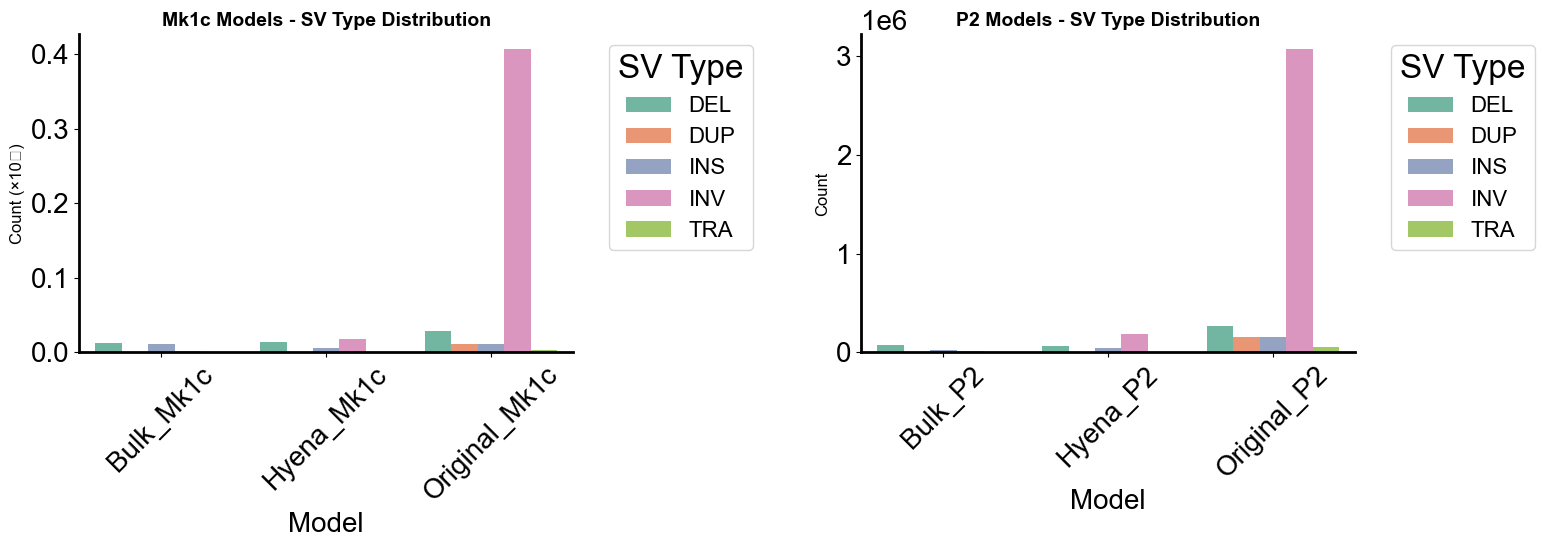

In [63]:
# Melt the data and ensure Count column is numeric
melted_data = combined_data.melt(id_vars=["Model"], var_name="SV Type", value_name="Count")
melted_data["Count"] = pd.to_numeric(melted_data["Count"], errors='coerce')

# Remove rows with NaN values (which were non-numeric strings like "Reference")
melted_data = melted_data.dropna()

# Clean up SV Type labels by removing "_count" suffix
melted_data["SV Type"] = melted_data["SV Type"].str.replace("_count", "")

# Clean up Model labels for better readability
melted_data["Model"] = melted_data["Model"].str.replace("bulk", "Mk1c bulk")
melted_data["Model"] = melted_data["Model"].str.replace("original_mk1c", "Mk1c MDA")
melted_data["Model"] = melted_data["Model"].str.replace("hyena_mk1c", "Mk1c ChimeraLM")

# Group by Model and SV Type to get proper counts
grouped_data = melted_data.groupby(["Model", "SV Type"])["Count"].sum().reset_index()

# Create two separate figures - one for Mk1c models, one for P2 models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Figure 1: All Mk1c Models - Grouped by Model with SV types as hue
mk1c_data = grouped_data[grouped_data["Model"].str.contains("Mk1c")]
sns.barplot(
    data=mk1c_data,
    x="Model",
    y="Count",
    hue="SV Type",
    palette="Set2",
    ax=ax1,
    dodge=True
)
ax1.set_title("Mk1c Models - SV Type Distribution", fontsize=14, fontweight="bold")
ax1.set_ylabel("Count (×10⁶)", fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title="SV Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis to show values in millions (1e6 scale)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}'))

sns.despine()

# Figure 2: All P2 Models - Grouped by Model with SV types as hue
p2_data = grouped_data[grouped_data["Model"].str.contains("P2")]
sns.barplot(
    data=p2_data,
    x="Model",
    y="Count",
    hue="SV Type",
    palette="Set2",
    ax=ax2,
    dodge=True
)
ax2.set_title("P2 Models - SV Type Distribution", fontsize=14, fontweight="bold")
ax2.set_ylabel("Count", fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title="SV Type", bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()

# Adjust layout to prevent label cutoff
plt.tight_layout()
fig.savefig("sv_pattern_distribution.pdf", dpi=300)

In [153]:
# Import necessary libraries
from cProfile import label
import matplotlib.pyplot as plt



def draw_sv_type_support_statistics(sv_artifact_data, figsize=(15, 6), figname=None):
    # Figure 1: Basic Statistics - Stacked Bar Chart
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    ax1 = axs[0]
    # ax1.bar('Total Reads', sv_artifact_data['Total Reads'], label='Total Reads', color='lightgrey')
    ax1.bar('Total Reads', sv_artifact_data['Non-supporting Reads'], label='Non-supporting Reads', color='salmon')
    ax1.bar('Total Reads', sv_artifact_data['Supporting SV Reads'], bottom=sv_artifact_data['Non-supporting Reads'], label='Supporting SV Reads', color='skyblue')
    ax1.set_title('Basic Statistics', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Number of Reads', fontsize=12)
    ax1.legend(loc='upper right')
    sns.despine()
    plt.tight_layout()

    # Figure 2: SV Type Support Statistics - Donut Pie Chart
    ax = axs[1]
    wedges, texts, autotexts = ax.pie(
        sv_artifact_data['SV Counts'], 
        wedgeprops=dict(width=0.5), 
        startangle=40, 
        colors=plt.cm.Set2.colors,
        autopct='%1.1f%%',
    )
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(f"{sv_artifact_data['SV Types'][i]} ({autotexts[i].get_text()})", 
                    xy=(x, y), xytext=(1.8*np.sign(x), 1.6*y),
                    horizontalalignment=horizontalalignment, **kw)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)
    ax.set_title('SV Type Support Statistics', fontsize=14, fontweight='bold')
    plt.tight_layout()

    if figname is not None:
        plt.savefig(figname, dpi=300)



In [154]:
p2_sv_artifact_data = {
    "Total Reads": 12193833,
    "Supporting SV Reads": 4300568,
    "Non-supporting Reads": 7893265,
    "SV Types": ["INV", "DEL", "DUP", "INS"],
    "SV Counts": [4348379, 251965, 169126, 147988],
}


In [155]:
mk1c_sv_artifact_data = {
    "Total Reads": 1571412,
    "Supporting SV Reads": 406283,
    "Non-supporting Reads": 1165129,
    "SV Types": ["INV", "DEL", "DUP", "INS"],
    "SV Counts": [404309, 16787, 10515, 5986],
}

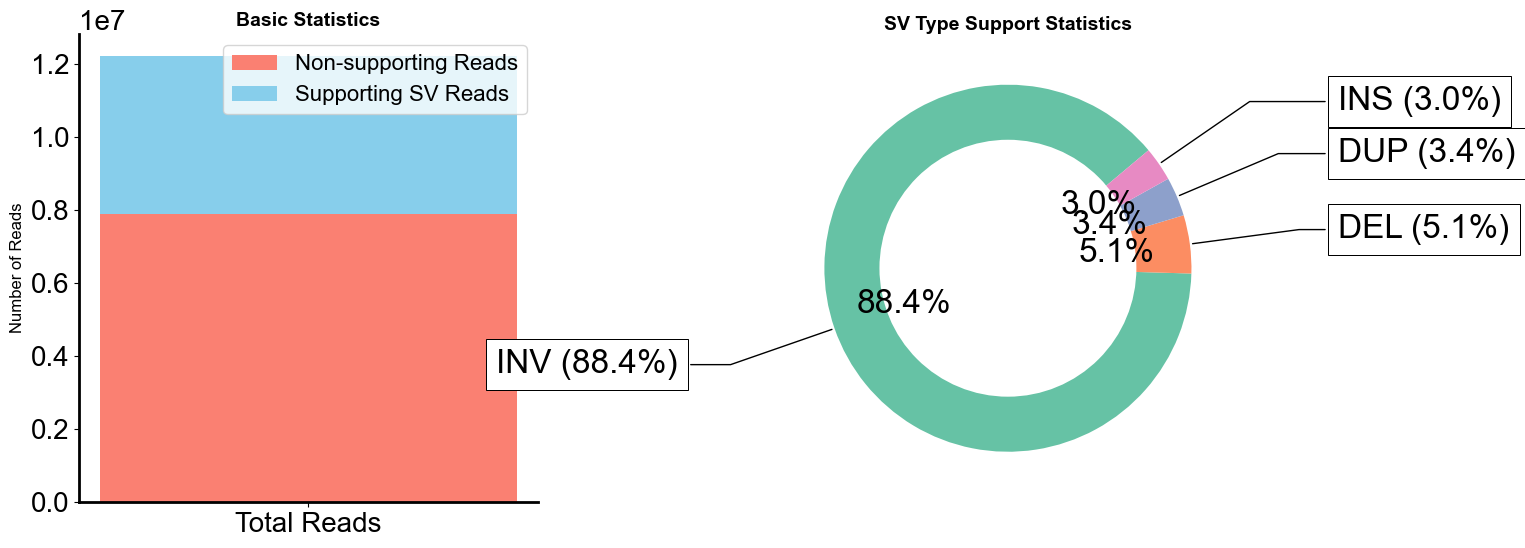

In [156]:
draw_sv_type_support_statistics(p2_sv_artifact_data, figname="p2_sv_type_support_statistics.pdf")

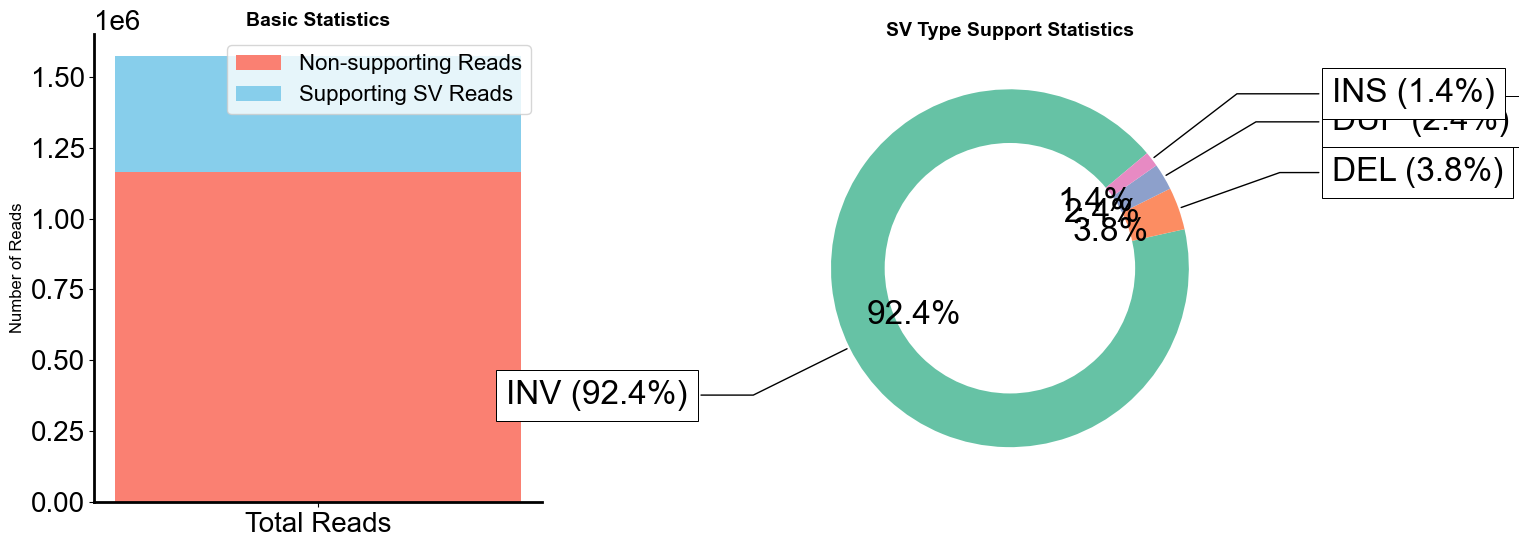

In [157]:
draw_sv_type_support_statistics(mk1c_sv_artifact_data, figname="mk1c_sv_type_support_statistics.pdf")